<a href="https://colab.research.google.com/github/proditor002/Multivariate/blob/main/exem01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###สอบย่อยครั้งที่ 1
**********************

In [4]:
import pandas as pd

In [5]:
import numpy as np

*****************
###ไฟล์ Pizza.csv

In [9]:
exam01_pizza = pd.read_csv('Pizza.csv')

In [10]:
exam01_pizza

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


*************************
###Checkขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [11]:
exam01_pizza.shape

(300, 9)

*********************
###Plot scatter matrix เพื่อดูการกระจายของ data

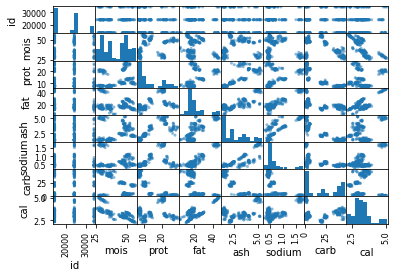

In [12]:
pd.plotting.scatter_matrix(exam01_pizza);

*************
##ลบdataที่ซ้ำกันออกและเลือกเก็บเฉพาะข้อมูลที่เป็นตัวเลข

In [13]:
new_Pizza = exam01_pizza.iloc[:,2:] 
new_Pizza.head()

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67


*************************
##checkว่าระหว่างcolumn มี correlation มากน้อยแค่ไหนด้วย numpy

หากdataตัวไหนมี correlation = 1 จะถูกลบออกเพื่อป้องกันการซ้ำของdata

In [14]:
corr = np.corrcoef(new_Pizza.to_numpy().T)

In [15]:
corr.shape

(7, 7)

In [17]:
corr #หากcolumn ไหน มีค่า correlation ใกล้เคียง 1 แสดงว่ามีความสัมพันธ์กันมาก

array([[ 1.        ,  0.36024768, -0.17131821,  0.26555552, -0.1022789 ,
        -0.59180165, -0.76444054],
       [ 0.36024768,  1.        ,  0.49800167,  0.8238437 ,  0.42912952,
        -0.85354226,  0.0702581 ],
       [-0.17131821,  0.49800167,  1.        ,  0.79163396,  0.93332522,
        -0.64023817,  0.7645671 ],
       [ 0.26555552,  0.8238437 ,  0.79163396,  1.        ,  0.80812215,
        -0.89898837,  0.32646845],
       [-0.1022789 ,  0.42912952,  0.93332522,  0.80812215,  1.        ,
        -0.62017634,  0.6719575 ],
       [-0.59180165, -0.85354226, -0.64023817, -0.89898837, -0.62017634,
         1.        , -0.02348458],
       [-0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,  0.6719575 ,
        -0.02348458,  1.        ]])

In [22]:
for i in range(corr.shape[0]) :
  for j in range(corr.shape[1]) :
    if (i != j) and (corr[i,j] == 1.0) : # ไม่เอาคอลัมน์ที่เลขซ้ำกัน เช่น 1,1 (i=j) 
      print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

In [25]:
data_Pizza_dropped = exam01_pizza.drop(['id','brand'], axis=1) #ลบคอลัมน์ id และ brand ออก
data_Pizza_dropped

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [28]:
data_Pizza_dropped2 = exam01_pizza.drop(['id'], axis=1) # ลบเพียงคอลัมน์ id ออกจากตาราง เพื่อที่จะได้นำคอลัมน์ brand มาใช้ในการเปรียบเทียบ
data_Pizza_dropped2

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


*************************
###plot กราฟ parallel coordinate

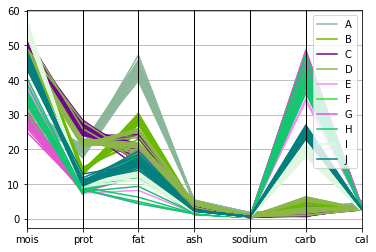

In [29]:
pd.plotting.parallel_coordinates(data_Pizza_dropped2, 'brand', cols = ['mois','prot','fat','ash','sodium','carb','cal'])

*****************
####ทำ PCA ต่อเพื่อลด Dimention ของข้อมูล

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=2) # ลองทำแค่ 2 Dimention ก่อน แล้วดูว่ามันสามารถอธิบายข้อมูลได้มากน้อยเพียงใด

In [32]:
new_pca = pca.fit_transform(data_Pizza_dropped.to_numpy()) # ใช้ data_Pizza_dropped เพราะในการทำ PCA ต้องใช้ข้อมูลที่เป็นตัวเลขเท่านั้น

In [33]:
new_pca.shape # จะได้ Data ที่มีแค่ 2 Dimention

(300, 2)

In [34]:
new_pca

array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

*****************
##check ว่ามีแบรนด์ร้านพิซซ่าใดบ้าง

In [36]:
BN = set(exam01_pizza['brand']) # set ของ data brand
BN

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

*********************
###สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลขจะได้ plot เป็นสีได้

In [38]:
BD_l = list(BN)  # แปลงให้เป็น list
BD_l.sort() ### เรียงค่าของสมาชิก
color_list2 = {}
num = 0
for each_fg in BD_l:
    if each_fg not in color_list2:
        color_list2[each_fg] = num
        num += 1

In [40]:
color_list2

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

In [41]:
data_Pizza_dropped3 = data_Pizza_dropped2.replace(color_list2)

In [42]:
data_Pizza_dropped3 # ข้อมูลคอลัมน์ brand จะเปลี่ยนตัวเลขที่เรากำหนดจาก color_list2 แทน

,brand,mois,prot,fat,ash,sodium,carb,cal
0,0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,9,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,9,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,9,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,9,47.60,10.43,15.18,2.32,0.56,24.47,2.76


**********************
###Plot กราฟ Scatter

In [43]:
from matplotlib import pyplot as plt

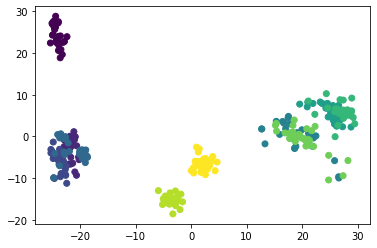

In [44]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_Pizza_dropped3['brand'])

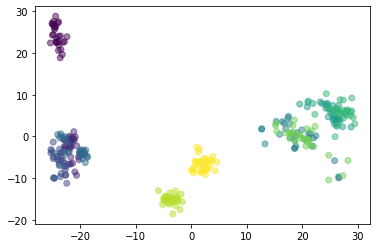

In [45]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_Pizza_dropped3['brand'], alpha = 0.5) # alpha ปรับค่าโปร่งใส

******************
###ทดลองเปรียบเทียบค่าสารอาหาร brand A และ F

In [52]:
AF = data_Pizza_dropped3[(data_Pizza_dropped3['brand']==0) | (data_Pizza_dropped3['brand']==5)]  ## ใช้  | และ  &  แทน  or  และ  and  ใน pandas
AF

,brand,mois,prot,fat,ash,sodium,carb,cal
0,0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,0,31.14,20.23,42.31,4.92,1.65,1.40,4.67
6,0,31.21,20.97,41.34,4.71,1.58,1.77,4.63
7,0,28.76,21.41,41.60,5.28,1.75,2.95,4.72
8,0,28.22,20.48,45.10,5.02,1.71,1.18,4.93
9,0,27.72,21.19,45.29,5.16,1.66,0.64,4.95


In [53]:
pca = PCA(n_components=2) #ต้องการเปรียบเทียบ brand  2 brand จึงกำหนด dimension = 2 dimansion
new_pca2 = pca.fit_transform(AF.iloc[:,1:].to_numpy())

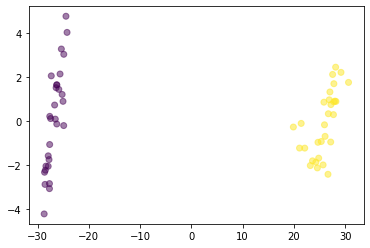

In [54]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = AF['brand'],alpha=0.5)

In [55]:
pca_brandA = pca.transform(AF[AF['brand']==0].iloc[:,1:].to_numpy())
pca_brandF = pca.transform(AF[AF['brand']==5].iloc[:,1:].to_numpy())

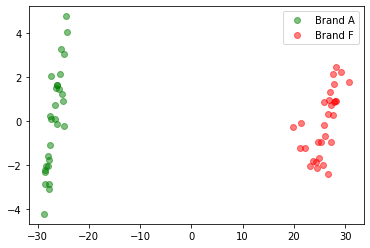

In [56]:
plt.plot(pca_brandA[:,0],pca_brandA[:,1],'og',alpha=0.5,label='Brand A')
plt.plot(pca_brandF[:,0],pca_brandF[:,1],'or',alpha=0.5,label='Brand F')
plt.legend()

*********************
###ดูว่า Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [57]:
pca.explained_variance_ratio_

array([0.99329504, 0.00511611])

ใส่ชื่อกราฟและแกน

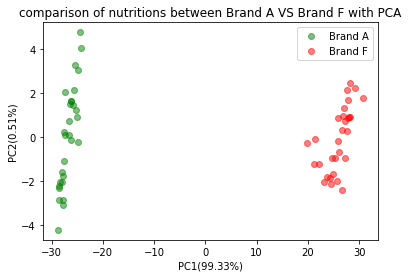

In [59]:
plt.plot(pca_brandA[:,0],pca_brandA[:,1],'og',alpha=0.5,label='Brand A') # ชื่อตัวแปรที่ 1
plt.plot(pca_brandF[:,0],pca_brandF[:,1],'or',alpha=0.5,label='Brand F') # ชื่อตัวแปรที่ 2
plt.legend()
plt.title('comparison of nutritions between Brand A VS Brand F with PCA') # ชื่อกราฟ
plt.xlabel('PC1(99.33%)')
plt.ylabel('PC2(0.51%)') ;

Principle components ที่เหมาะสมและถูกเลือกนำมาใช้จะครอบคลุม variance ประมาณ 90% จากเปรียบเทียบสารอาหาร Brand A และ Brand F พบว่าค่า PC1 + PC2 เมื่อนำมารวมกัน มีค่าเท่ากับ 99.84% หมายความว่า สามารถอธิบายข้อมูลได้มากถึง 99.84% ซึ่งถือว่าสามารถอธิบายข้อมูลได้อย่างครอบคลุม

********************************
###nndb_flat

In [65]:
import pandas as pd

In [70]:
data_nndb_flat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nndb_flat.csv')
data_nndb_flat

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


********************
###ตรวจสอบขนาดของข้อมูลว่ามี Data กี่ตัวและมีกี่ Dimention

In [71]:
data_nndb_flat.shape # ดูขนาดของข้อมูลว่ามีกี่ Dimention (45 Dimention)

(8618, 45)

*****************
##Plot scatter matrix เพื่อดูการกระจายของ data ในมุมมองต่างๆ

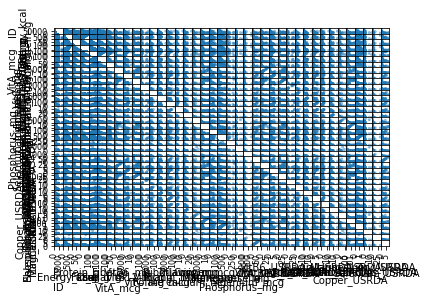

In [72]:
pd.plotting.scatter_matrix(data_nndb_flat) ;

เนื่องจาก Data มี Dimention มากเกินไป ทำให้เรามองข้อมูลไม่ออก อาจจะมีคอลัมน์ที่เก็บข้อมูลซ้ำกันก็ได้ จึงต้องลด Dimention ของข้อมูลลง ดังนั้นขั้นตอนแรกคือเราจะต้องทดสอบว่า คอลัมน์ใดให้ข้อมูลซ้ำกับคอลัมน์อื่น แล้วทำการลบออก


เลือกข้อมูลมาทำต่อเฉพาะข้อมูลที่เป็นตัวเลข

In [73]:
newdata_nndb_flat = data_nndb_flat.iloc[:,7:] # ลบข้อมูลที่เป็นตัวอักษรออก
newdata_nndb_flat.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


********************
###ตรวจสอบว่าระหว่างคอลัมน์มี correlation กันมากน้อยเพียงใดด้วย Numpy


เราต้องการลด Dimention ของข้อมูล ดังนั้น เมื่อหาค่า correlation ออกมาแล้วมีข้อมูลตัวใดที่มีค่า correlation = 1 เราจะลบออก เพื่อไม่ให้เกิดการซ้ำซ้อนของข้อมูล

In [74]:
import numpy as np #ก่อนจะ import Package Numpy จะต้องลบข้อมูลที่เป็นตัวอักษรออกก่อน เนื่องจาก Package นี้ทำกับข้อมูลที่เป็นตัวอักษรไม่ได้

In [75]:
corr = np.corrcoef(newdata_nndb_flat.to_numpy().T)

In [76]:
corr.shape

(38, 38)

In [77]:
corr # คอลัมน์ไหนมีความสัมพันธ์กันเกือบ 1 แสดงว่ามีความสัมพันธ์กันมาก หรือข้อมูลอาจจะเป็นตัวเดียวกัน

array([[1.        , 0.11030203, 0.80679472, ..., 0.19518065, 0.05667274,
        0.11276635],
       [0.11030203, 1.        , 0.05471538, ..., 0.44460761, 0.37836917,
        0.41631538],
       [0.80679472, 0.05471538, 1.        , ..., 0.06608644, 0.03755914,
        0.02826352],
       ...,
       [0.19518065, 0.44460761, 0.06608644, ..., 1.        , 0.22368557,
        0.26657694],
       [0.05667274, 0.37836917, 0.03755914, ..., 0.22368557, 1.        ,
        0.20529859],
       [0.11276635, 0.41631538, 0.02826352, ..., 0.26657694, 0.20529859,
        1.        ]])

In [78]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 10 column = 27 corrcoef = 1.0
row = 12 column = 29 corrcoef = 1.0
row = 13 column = 30 corrcoef = 1.0
row = 14 column = 31 corrcoef = 1.0
row = 18 column = 34 corrcoef = 1.0
row = 20 column = 35 corrcoef = 1.0
row = 22 column = 37 corrcoef = 1.0
row = 27 column = 10 corrcoef = 1.0
row = 29 column = 12 corrcoef = 1.0
row = 30 column = 13 corrcoef = 1.0
row = 31 column = 14 corrcoef = 1.0
row = 34 column = 18 corrcoef = 1.0
row = 35 column = 20 corrcoef = 1.0
row = 37 column = 22 corrcoef = 1.0


In [79]:
newdata_nndb_flat.iloc[:5,10:30]

,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA
0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625
1,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625
2,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188
3,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500
4,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375


plot กราฟดู ถ้ากราฟเป็นเส้นตรงแสดงว่าข้อมูลมันซ้ำกัน เป็นค่าเดียวกัน ดังนั้นต้องทำการลบคอลัมน์นั้นออก

In [80]:
from matplotlib import pyplot as plt

Data ที่มี correlation เป็น 1

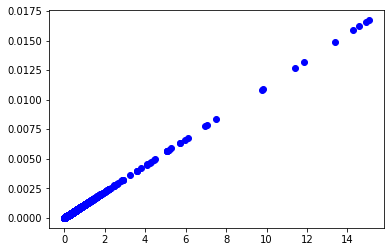

In [81]:
plt.plot(newdata_nndb_flat.iloc[:,16],newdata_nndb_flat.iloc[:,33], 'ob')


Data ที่มี correlation เป็นค่าอื่นๆ

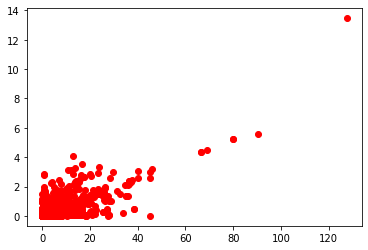

In [82]:
plt.plot(newdata_nndb_flat.iloc[:,12],newdata_nndb_flat.iloc[:,30], 'or')

In [83]:
newdata_nndb_flat.columns.str.contains('_USRDA') #คอลัมน์ที่เป็น True หมายถึง คอลัมน์ที่มีคำว่า _USRDA

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [84]:
newdata_nndb_flat.columns[newdata_nndb_flat.columns.str.contains('_USRDA')].values #เป็นการดูว่าคอลัมน์ไหนมีคำว่า _USRDA บ้าง ผลที่ออกมาจะเป็น list ของคอลัมน์ทั้งหมดที่มีคำว่า _USRDA

array(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA',
       'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA',
       'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA',
       'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'], dtype=object)

In [85]:
newdata_nndb_flat.drop(newdata_nndb_flat.columns[newdata_nndb_flat.columns.str.contains('_USRDA')].values, axis=1) # ลบคอลัมน์ที่มีคำว่า _USRDA ออก

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


ด้านบนคือลบแบบเร็ว จะเห็นว่ามันลบคอลัมน์ไปเยอะเกิน ก็เลยลบแบบอื่น เลือกลบคอลัมน์ที่มีค่า correlation เป็น 1 เท่านั้น

##ลบคอลัมน์ที่มีค่า correlation เป็น 1 เมื่อเทียบกับคอลัมน์อื่น

In [86]:
newdata_nndb_flat_dropped = newdata_nndb_flat.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
newdata_nndb_flat_dropped

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [87]:
data_nndb_flat_dropped  = data_nndb_flat.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_nndb_flat_dropped

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


*******************
###ทดลอง plot กราฟ parallel coordinate

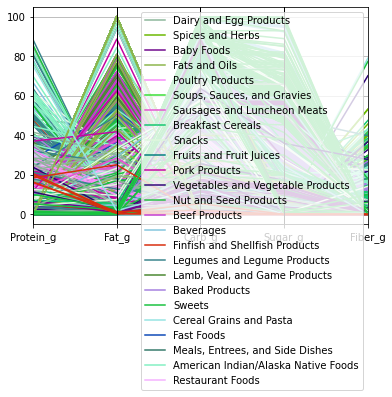

In [88]:
pd.plotting.parallel_coordinates(data_nndb_flat_dropped , 'FoodGroup', cols=['Protein_g', 'Fat_g',	'Carb_g',	'Sugar_g',	'Fiber_g'])

********************
###ทำ PCA ต่อเพื่อลด Dimention ของข้อมูล

In [89]:
from sklearn.decomposition import PCA

In [90]:
pca = PCA(n_components=2) # ลองทำแค่ 2 Dimention ก่อน แล้วดุว่ามันสามารถอธิบายข้อมูลได้มากน้อยเพียงใด

In [91]:
new_pca = pca.fit_transform(newdata_nndb_flat_dropped.to_numpy()) # ใช้ newdata_dropped เพราะในการทำ PCA ต้องใช้ข้อมูลที่เป็นตัวเลขเท่านั้น

In [92]:
new_pca.shape # จะได้ Data ที่มีแค่ 2 Dimention

(8618, 2)

ดูว่ามี food group อะไรบ้าง

In [93]:
FG = set(data_nndb_flat['FoodGroup']) # set ของ data food group
FG

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}

********************
##สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลขจะได้ plot เป็นสีได้

สร้าง color list

In [94]:
FG_l = list(FG)
FG_l.sort()
color_list2 = {}
num = 0
for each_fg in FG_l :
  if each_fg not in color_list2 :
    color_list2[each_fg] = num
    num += 1

In [95]:
color_list2

{'American Indian/Alaska Native Foods': 0,
 'Baby Foods': 1,
 'Baked Products': 2,
 'Beef Products': 3,
 'Beverages': 4,
 'Breakfast Cereals': 5,
 'Cereal Grains and Pasta': 6,
 'Dairy and Egg Products': 7,
 'Fast Foods': 8,
 'Fats and Oils': 9,
 'Finfish and Shellfish Products': 10,
 'Fruits and Fruit Juices': 11,
 'Lamb, Veal, and Game Products': 12,
 'Legumes and Legume Products': 13,
 'Meals, Entrees, and Side Dishes': 14,
 'Nut and Seed Products': 15,
 'Pork Products': 16,
 'Poultry Products': 17,
 'Restaurant Foods': 18,
 'Sausages and Luncheon Meats': 19,
 'Snacks': 20,
 'Soups, Sauces, and Gravies': 21,
 'Spices and Herbs': 22,
 'Sweets': 23,
 'Vegetables and Vegetable Products': 24}

แทนค่า text ใน Dictionary ด้วยตัวเลขที่เรากำหนด

In [96]:
data__nndb_flat_dropped2 = data_nndb_flat_dropped.replace(color_list2)

In [97]:
data__nndb_flat_dropped2

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,7,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,7,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,7,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,10,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,10,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,23,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,10,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


******************
###Plot กราฟ Scatter

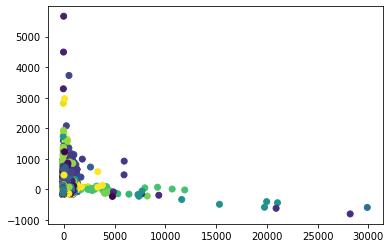

In [98]:
plt.scatter(new_pca[:,0], new_pca[:,1], c = data__nndb_flat_dropped2['FoodGroup']) ;

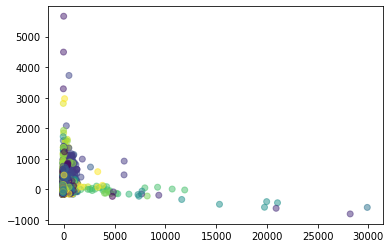

In [99]:
plt.scatter(new_pca[:,0], new_pca[:,1], c =  data__nndb_flat_dropped2['FoodGroup'], alpha= 0.5) ; # alpha ปรับค่าโปร่งใส

*******************
##ทดลองเปรียบเทียบค่าสารอาหาร Dairy and Egg Products และ Sausages and Luncheon Meats

In [100]:
DS = data__nndb_flat_dropped2[(data__nndb_flat_dropped2['FoodGroup'] == 7) | (data__nndb_flat_dropped2['FoodGroup'] == 19)]
DS

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,7,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,7,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,7,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,19,312.0,12.00,28.51,1.80,0.00,0.0,0.0,0.120,1.54,0.0,4.0,20.0,0.060,1.43,0.000,12.0,0.000000,0.070588,0.641667,0.0,0.011333,0.0100,0.151250,0.076923,0.041667,0.016667,0.000067,0.007143,0.124286,0.218182,0.197273
8587,7,46.0,1.60,2.00,5.30,5.30,0.0,61.0,0.000,0.00,0.0,0.0,82.0,0.020,0.10,0.000,1.8,0.067778,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.000000,0.000000,0.068333,0.000022,0.002381,0.142857,0.032727,0.009091
8595,7,179.0,28.40,5.10,3.40,1.33,0.0,40.0,0.080,1.68,0.0,6.0,961.0,0.027,0.17,0.000,12.7,0.044444,0.047059,0.700000,0.0,0.004667,0.0150,0.005625,0.276923,0.016667,0.800833,0.000030,0.085714,0.864286,0.230909,0.354545
8597,7,280.0,27.50,17.10,3.10,1.23,0.0,137.0,0.080,0.92,0.0,9.0,731.0,0.027,0.25,0.000,15.7,0.152222,0.047059,0.383333,0.0,0.010000,0.0225,0.007500,0.261538,0.016667,0.609167,0.000030,0.061905,0.748571,0.285455,0.284545


In [101]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(DS.iloc[:,1:].to_numpy())

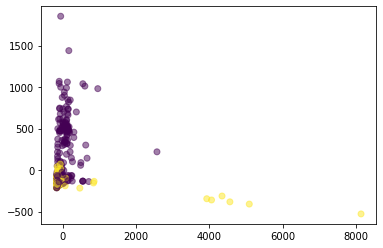

In [102]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = DS['FoodGroup'],alpha=0.5)

In [103]:
DEP_pca = pca.transform(DS[DS['FoodGroup']==7].iloc[:,1:].to_numpy())
SLM_pca = pca.transform(DS[DS['FoodGroup']==19].iloc[:,1:].to_numpy())

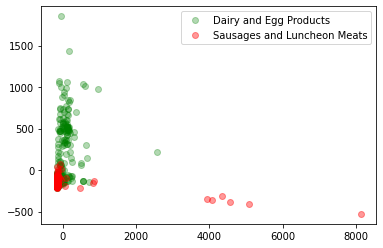

In [105]:
plt.plot(DEP_pca[:,0],DEP_pca[:,1],'og',alpha=0.3,label='Dairy and Egg Products')
plt.plot(SLM_pca[:,0],SLM_pca[:,1],'or',alpha=0.4,label='Sausages and Luncheon Meats')
plt.legend()

In [106]:
pca.explained_variance_ratio_

array([0.76328863, 0.19877036])

ใส่ชื่อกราฟและแกน

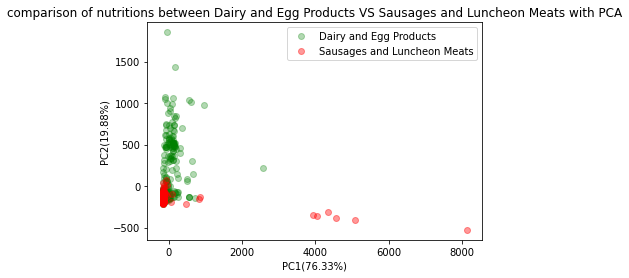

In [107]:
plt.plot(DEP_pca[:,0],DEP_pca[:,1],'og',alpha=0.3,label='Dairy and Egg Products') # ชื่อตัวแปรที่ 1
plt.plot(SLM_pca[:,0],SLM_pca[:,1],'or',alpha=0.4,label='Sausages and Luncheon Meats') # ชื่อตัวแปรที่ 2
plt.legend()
plt.title('comparison of nutritions between Dairy and Egg Products VS Sausages and Luncheon Meats with PCA') # ชื่อกราฟ
plt.xlabel('PC1(76.33%)')
plt.ylabel('PC2(19.88%)') ;

Principle components ที่เหมาะสมและถูกเลือกนำมาใช้จะครอบคลุม variance ประมาณ 90% จากเปรียบเทียบสารอาหาร Dairy and Egg Products และ Sausages and Luncheon Meats พบว่าค่า PC1 + PC2 เมื่อนำมารวมกัน มีค่าเท่ากับ 96.21% หมายความว่า สามารถอธิบายข้อมูลได้มากถึง 96.21% ซึ่งถือว่าสามารถอธิบายข้อมูลได้อย่างครอบคลุม